In [1]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

/Users/oscarsaravia/Documents/Universidad/security-data-science/SDS-LAB07/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/oscarsaravia/Documents/Universidad/security-data-science/SDS-LAB07/venv/lib/python3.11/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
use_model = load_model('./model')
load_x = np.load('x_val.npy')
load_y = np.loadtxt('y_val.txt', delimiter=',')

2023-05-23 20:13:43.609088: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-05-23 20:13:43.619866: W tensorflow/c/c_api.cc:304] Operation '{name:'AssignVariableOp_2' id:107 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_2}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](count_1, Identity_2)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


/Users/oscarsaravia/Documents/Universidad/security-data-science/SDS-LAB07/venv/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-23 20:13:49.044840: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1/Sigmoid' id:150 op device:{requested: '', assigned: ''} def:{{{node dense_1/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


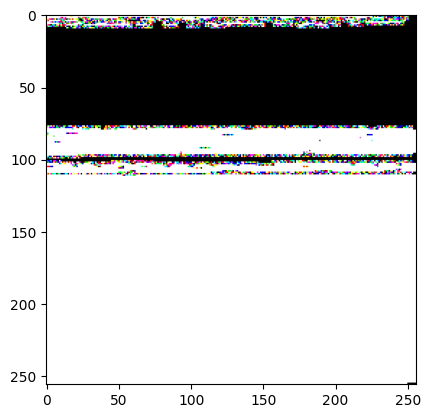

In [3]:
keras_classifier = KerasClassifier(use_model)
fgm = FastGradientMethod(estimator=keras_classifier, eps=2.7)
t_images = fgm.generate(x=load_x)
plt.imshow(X=t_images[0])

In [4]:
score_original = keras_classifier._model.evaluate(x=load_x,y=load_y)
score_stolen = keras_classifier._model.evaluate(x=load_x,y=load_y)

/Users/oscarsaravia/Documents/Universidad/security-data-science/SDS-LAB07/venv/lib/python3.11/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-23 20:14:33.941634: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:226 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [8]:
print("Test loss: ", score_original[0])
print("Stololen test loss: ", score_stolen[0])
print("Original Test loss: ", score_original[1])
print("Original Stololen test loss: ", score_stolen[1])


Test loss:  33.62270837402344
Stololen test loss:  33.62270837402344
Original Test loss:  0.645
Original Stololen test loss:  0.645


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


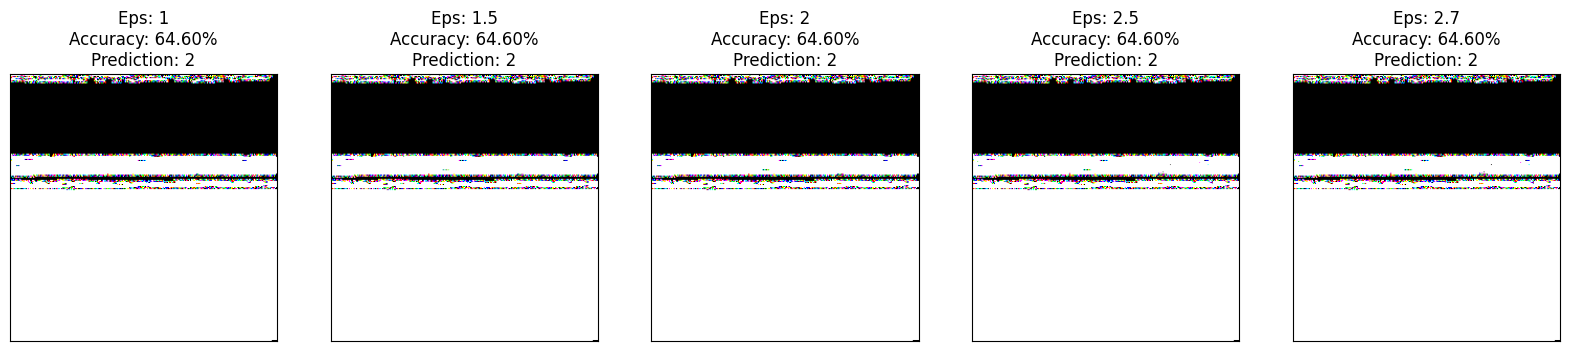

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
eps = [1, 1.5, 2, 2.5, 2.7]
ep_count = 0

for i in range(5):    
  attack_fgsm = FastGradientMethod(estimator=keras_classifier, eps=eps[ep_count])
  t_imgs = attack_fgsm.generate(x=load_x)
  axes[i].imshow(X=t_imgs[0])
  axes[i].set_xticks(ticks=[])
  axes[i].set_yticks(ticks=[])
  score = keras_classifier._model.evaluate(x=t_imgs, y=load_y)[1]
  prediction = np.argmax(use_model.predict(x=np.expand_dims(a=t_imgs[0], axis=0)))    

  axes[i].set_title(label=f"Eps: {eps[ep_count]}\n" f"Accuracy: {score * 100:.2f}%\n" f"Prediction: {prediction}")
  ep_count += 1

plt.show()

Discusion:
<br>
    * Se lograron resultados superiores en el modelo de evasión gracias a la capacidad de sabotear o cambiar el modelo original y reducir la precision obtenida. Se puede entrenar el modelo para obtener mejores resultados.
